In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import gaussian_kde

In [23]:
eu27_codes = ['AT', 'BE', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'EL', 'HU', 'IE', 'IT', 'LV', 'LT',
              'LU', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SI', 'ES', 'SE']



In [25]:
yields = pd.read_csv('yields.csv')

In [26]:
yields.head()

,Unnamed: 0,freq,crops,strucpro,geo\TIME_PERIOD,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,246,A,C0000,YI_HU_EU,AT,NaN,NaN,NaN,NaN,NaN,...,5.85,7.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,247,A,C0000,YI_HU_EU,BG,NaN,NaN,NaN,NaN,NaN,...,4.67,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,248,A,C0000,YI_HU_EU,CH,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,249,A,C0000,YI_HU_EU,CY,NaN,NaN,NaN,NaN,NaN,...,1.69,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,250,A,C0000,YI_HU_EU,CZ,NaN,NaN,NaN,NaN,NaN,...,5.32,6.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
len(yields.crops.unique())

59

In [28]:
yields.drop(columns = ['Unnamed: 0', 'freq'], inplace = True)

In [29]:
yields.rename(columns = {'geo\TIME_PERIOD': 'geo'}, inplace = True)

In [30]:
yields.head()

,crops,strucpro,geo,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,C0000,YI_HU_EU,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.85,7.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0000,YI_HU_EU,BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.67,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0000,YI_HU_EU,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0000,YI_HU_EU,CY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.69,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0000,YI_HU_EU,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.32,6.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
yields_long = yields.melt(id_vars = ['crops', 'strucpro', 'geo'])

In [32]:
yields_long.shape

(34546, 5)

In [33]:
yields_long.dropna(inplace = True)
yields_long.shape

(16280, 5)

In [34]:
yields_long.head()

,crops,strucpro,geo,variable,value
64,C1100,YI_HU_EU,EL,2000,2.34
66,C1100,YI_HU_EU,FI,2000,3.59
68,C1100,YI_HU_EU,HR,2000,4.75
70,C1100,YI_HU_EU,IE,2000,8.85
75,C1100,YI_HU_EU,LV,2000,2.70


In [35]:
yields_long.crops.unique()

array(['C1100', 'C1110', 'C1111', 'C1112', 'C1120', 'C1200', 'C1210',
       'C1300', 'C1310', 'C1320', 'C1400', 'C1410', 'C1420', 'C1500',
       'C1600', 'C1700', 'C1900', 'C2000', 'C2100', 'C2200', 'G0000',
       'G1000', 'G2000', 'G2100', 'G2900', 'G3000', 'G9100', 'G9900',
       'I1100', 'I1110', 'I1110-1130', 'I1111', 'I1112', 'I1120', 'I1130',
       'I1140', 'I1150', 'I1190', 'I2100', 'I2200', 'I2300', 'I3000',
       'I4000', 'I5000', 'P1100', 'P1200', 'P1300', 'P9000', 'R1000',
       'R2000', 'R9000', 'C0000', 'C1000', 'C1220', 'I0000', 'I6000',
       'P0000', 'R0000', 'I2900'], dtype=object)

In [36]:
yields_long_ie = yields_long[yields_long.geo == 'IE']

In [37]:
yields_long_ie.head()

,crops,strucpro,geo,variable,value
70,C1100,YI_HU_EU,IE,2000,8.85
107,C1110,YI_HU_EU,IE,2000,8.88
144,C1111,YI_HU_EU,IE,2000,9.26
178,C1112,YI_HU_EU,IE,2000,7.57
314,C1300,YI_HU_EU,IE,2000,6.81


In [38]:
yields_long_ie.crops.unique()

array(['C1100', 'C1110', 'C1111', 'C1112', 'C1300', 'C1310', 'C1320',
       'C1400', 'C1410', 'G3000', 'G9100', 'I1100', 'I1110', 'I1110-1130',
       'R1000', 'R2000', 'I1111', 'I1112', 'P1100', 'P1200', 'C0000',
       'C1000'], dtype=object)

In [39]:
yields_long_potatoes = yields_long[yields_long.crops == 'R1000']

In [40]:
yields_long_potatoes.head()

,crops,strucpro,geo,variable,value
1410,R1000,YI_HU_EU,BA,2000,6.52
1419,R1000,YI_HU_EU,EL,2000,29.92
1421,R1000,YI_HU_EU,FI,2000,24.46
1423,R1000,YI_HU_EU,HR,2000,11.50
1425,R1000,YI_HU_EU,IE,2000,33.60


In [41]:
yields_long_potatoes_sample = yields_long_potatoes[(yields_long_potatoes.geo.isin(
    ['AT', 'BE', 'DE', 'DK', 'EU27_2020', 'IE', 'NL', 'UK'])) & 
                                                   (yields_long_potatoes.variable >= '2010')]

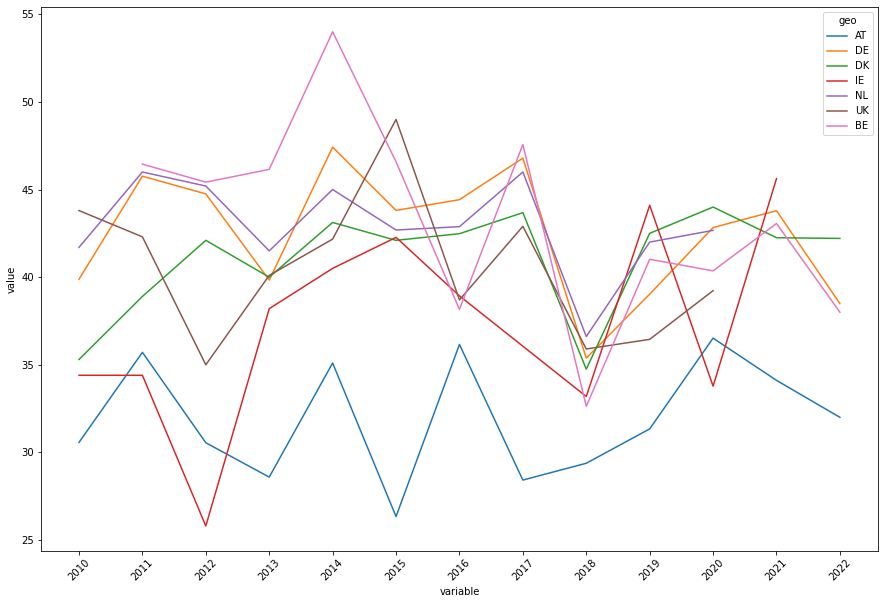

In [42]:
f, ax = plt.subplots(figsize = (15, 10))

ax = sns.lineplot(x = 'variable', y = 'value', hue = 'geo', data = yields_long_potatoes_sample)

plt.setp(ax.get_xticklabels(), rotation = 45)

plt.show()

In [43]:
yields_potatoes_eu = yields_long_potatoes[yields_long_potatoes.geo.isin(eu27_codes)]

In [44]:
yields_potatoes_eu_mean = yields_long_potatoes.groupby('geo').mean().reset_index().sort_values('value')

In [45]:
yields_potatoes_eu_mean.head()

,geo,value
2,BA,9.876364
24,MK,14.176667
29,RO,14.836522
23,ME,15.366000
20,LT,15.728462


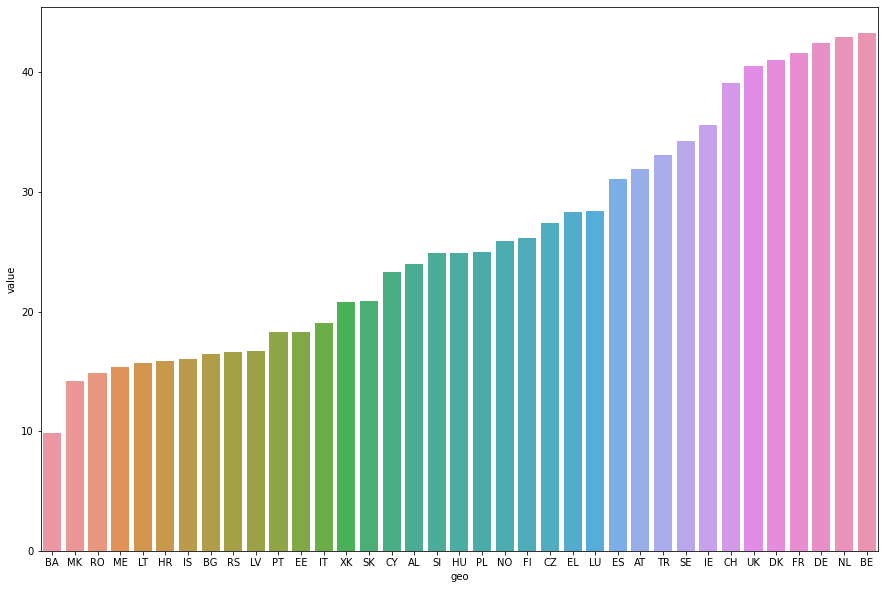

In [46]:
f, ax = plt.subplots(figsize = (15, 10))

ax = sns.barplot(x = 'geo', y = 'value', data = yields_potatoes_eu_mean)

plt.show()

In [47]:
# Let's compare Irish potato yields to that of the whole EU

In [48]:
yields_long_potatoes.head()

,crops,strucpro,geo,variable,value
1410,R1000,YI_HU_EU,BA,2000,6.52
1419,R1000,YI_HU_EU,EL,2000,29.92
1421,R1000,YI_HU_EU,FI,2000,24.46
1423,R1000,YI_HU_EU,HR,2000,11.50
1425,R1000,YI_HU_EU,IE,2000,33.60


In [49]:
# What is the code for the eu, I'll look at all distinct codes to find it

yields_long_potatoes.geo.unique()

array(['BA', 'EL', 'FI', 'HR', 'IE', 'LV', 'PT', 'RO', 'CY', 'EE', 'MK',
       'ME', 'RS', 'XK', 'AT', 'BG', 'CZ', 'DE', 'DK', 'ES', 'FR', 'HU',
       'IT', 'LT', 'LU', 'NL', 'NO', 'PL', 'SE', 'SI', 'SK', 'UK', 'BE',
       'CH', 'TR', 'AL', 'IS'], dtype=object)

In [50]:
len(yields_long_potatoes.geo.unique())
print(yields_long_potatoes.shape)
yields_long_potatoes.dropna(inplace = True)
print(yields_long_potatoes.shape)

(540, 5)
(540, 5)


C:\Users\justi\AppData\Local\Temp\ipykernel_14076\3667152337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yields_long_potatoes.dropna(inplace = True)


In [51]:
yields_long_potatoes.isnull().sum()

crops       0
strucpro    0
geo         0
variable    0
value       0
dtype: int64

In [52]:
yields_long_potatoes[yields_long_potatoes.geo == 'IE']

,crops,strucpro,geo,variable,value
1425,R1000,YI_HU_EU,IE,2000,33.60
2927,R1000,YI_HU_EU,IE,2001,33.50
4429,R1000,YI_HU_EU,IE,2002,33.70
5931,R1000,YI_HU_EU,IE,2003,34.50
7433,R1000,YI_HU_EU,IE,2004,41.40
8935,R1000,YI_HU_EU,IE,2005,34.70
10437,R1000,YI_HU_EU,IE,2006,33.40
11939,R1000,YI_HU_EU,IE,2007,34.00
13441,R1000,YI_HU_EU,IE,2008,30.70
14943,R1000,YI_HU_EU,IE,2009,27.60


In [53]:
yields_potatoes_country_wide = yields_long_potatoes.pivot_table(index = ['crops', 'strucpro', 'variable'],
                                                                columns = 'geo', values = 'value')

yields_potatoes_country_wide.reset_index(inplace = True)

yields_potatoes_country_wide_2010 = yields_potatoes_country_wide[yields_potatoes_country_wide.variable >= '2010']

#yields_potatoes_country_wide_2010.dropna(axis = 1, inplace = True)

yields_potatoes_country_wide_2010.IE

10    34.40
11    34.40
12    25.80
13    38.20
14    40.50
15    42.27
16    38.93
17      NaN
18    33.19
19    44.10
20    33.78
21    45.62
22      NaN
Name: IE, dtype: float64

In [54]:
# I'm going to test for independence, I want each country to be a column for this


yields_potatoes_country_wide = yields_long_potatoes.pivot_table(index = ['crops', 'strucpro', 'variable'],
                                                                columns = 'geo', values = 'value')

yields_potatoes_country_wide.reset_index(inplace = True)

# Many countries only have data from 2010 so I'm filtering for years after 2010


yields_potatoes_country_wide_2010 = yields_potatoes_country_wide.query('variable >= "2010" & variable != "2017" & variable <= "2021"')

# There are still some countries with missing values because there aren't many I'll simply drop those columns

yields_potatoes_country_wide_2010.dropna(axis = 1, inplace = True)

# check if there are any nan values left

yields_potatoes_country_wide_2010.isnull().sum()

C:\Users\justi\AppData\Local\Temp\ipykernel_14076\3539115122.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yields_potatoes_country_wide_2010.dropna(axis = 1, inplace = True)


geo
crops       0
strucpro    0
variable    0
AT          0
BA          0
BG          0
CY          0
CZ          0
DE          0
DK          0
EE          0
EL          0
ES          0
FI          0
HR          0
IE          0
LT          0
LU          0
ME          0
MK          0
PL          0
PT          0
RO          0
SE          0
SI          0
SK          0
XK          0
dtype: int64

In [55]:
def test_independence(df, var1, var):
    r, p = pearsonr(df[var1], df[var2])
    return r, p

In [56]:
variables = list(yields_potatoes_country_wide_2010.select_dtypes(include = 'float').columns)

results = []

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        r, p = test_independence(yields_potatoes_country_wide_2010, var1, var2)
        if p < 0.05:
            results.append('There is a significant relationship between {} and {}'.format(var1, var2))
        else:
            results.append('There is no significant relationship between {} and {}'.format(var1, var2))

In [57]:
results_ie = [s for s in results if 'IE' in s]

In [58]:
print(len(results_ie))
results_ie

# Only one of the 23 results shows a statistically significant relationship, seen as we were using a p-value of 0.05
# It's possible that this is entirely due to chance so I will treat the data as being independent

23


['There is no significant relationship between AT and IE',
 'There is no significant relationship between BA and IE',
 'There is no significant relationship between BG and IE',
 'There is no significant relationship between CY and IE',
 'There is no significant relationship between CZ and IE',
 'There is no significant relationship between DE and IE',
 'There is no significant relationship between DK and IE',
 'There is no significant relationship between EE and IE',
 'There is no significant relationship between EL and IE',
 'There is a significant relationship between ES and IE',
 'There is no significant relationship between FI and IE',
 'There is no significant relationship between HR and IE',
 'There is no significant relationship between IE and LT',
 'There is no significant relationship between IE and LU',
 'There is no significant relationship between IE and ME',
 'There is no significant relationship between IE and MK',
 'There is no significant relationship between IE and PL'

In [59]:
results_normal = []

for var in variables:
    stat, p = shapiro(yields_potatoes_country_wide_2010[var])
    
    if p > 0.05:
        
        results_normal.append(f'The data for {var} is likely normally distributed')
        
    else:
        
        results_normal.append(f'The data for {var} is likely not normally distributed')

In [60]:
print(len(results_normal))
results_normal

# The data is likely normally distributed for all countries data with the exception of DK
# Howvever, we're using a p-value of 0.05 and seen as we performed 24 tests
# It's possible that this result is just due to chance
# As such I will treat the data as being normally distributed

24


['The data for AT is likely normally distributed',
 'The data for BA is likely normally distributed',
 'The data for BG is likely normally distributed',
 'The data for CY is likely normally distributed',
 'The data for CZ is likely normally distributed',
 'The data for DE is likely normally distributed',
 'The data for DK is likely not normally distributed',
 'The data for EE is likely normally distributed',
 'The data for EL is likely normally distributed',
 'The data for ES is likely normally distributed',
 'The data for FI is likely normally distributed',
 'The data for HR is likely normally distributed',
 'The data for IE is likely normally distributed',
 'The data for LT is likely normally distributed',
 'The data for LU is likely normally distributed',
 'The data for ME is likely normally distributed',
 'The data for MK is likely normally distributed',
 'The data for PL is likely normally distributed',
 'The data for PT is likely normally distributed',
 'The data for RO is likely

In [61]:
# Finally let's test for constant variance

results_variance = []

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        
        var1 = variables[i]
        var2 = variables[j]
        
        stat, p = levene(yields_potatoes_country_wide_2010[var1], yields_potatoes_country_wide_2010[var2])
        
        if p > 0.05:
            results_variance.append(f'The variance of {var1} and {var2} are likely equal')
        else:
            results_variance.append(f'The variance of {var1} and {var2} are likely not equal')

In [62]:
results_variance_ie = [s for s in results_variance if 'IE' in s]

In [63]:
results_variance_ie

# The variances are equal for some, unequal for others

['The variance of AT and IE are likely equal',
 'The variance of BA and IE are likely not equal',
 'The variance of BG and IE are likely equal',
 'The variance of CY and IE are likely not equal',
 'The variance of CZ and IE are likely equal',
 'The variance of DE and IE are likely equal',
 'The variance of DK and IE are likely equal',
 'The variance of EE and IE are likely not equal',
 'The variance of EL and IE are likely equal',
 'The variance of ES and IE are likely not equal',
 'The variance of FI and IE are likely not equal',
 'The variance of HR and IE are likely not equal',
 'The variance of IE and LT are likely not equal',
 'The variance of IE and LU are likely equal',
 'The variance of IE and ME are likely not equal',
 'The variance of IE and MK are likely not equal',
 'The variance of IE and PL are likely equal',
 'The variance of IE and PT are likely equal',
 'The variance of IE and RO are likely not equal',
 'The variance of IE and SE are likely not equal',
 'The variance o

In [64]:
# The data is independent and normal.
# Although for many countries, IE does not have equal variance
# The assumptions for ANOVA are almost met so I will in the first instance run an ANOVA

In [65]:
yields_potatoes_country_wide_2010.head()

geo,crops,strucpro,variable,AT,BA,BG,CY,CZ,DE,DK,...,LU,ME,MK,PL,PT,RO,SE,SI,SK,XK
10,R1000,YI_HU_EU,2010,30.57,10.39,18.19,19.27,24.56,39.88,35.30,...,31.74,14.60,15.10,17.9,15.03,13.29,30.01,24.54,14.75,23.23
11,R1000,YI_HU_EU,2011,35.71,10.98,14.24,24.89,30.45,45.76,38.90,...,30.99,16.50,14.16,20.5,14.71,16.41,31.89,26.42,20.94,23.23
12,R1000,YI_HU_EU,2012,30.55,8.13,10.15,18.07,27.98,44.75,42.10,...,32.26,11.80,12.68,24.4,17.79,10.75,32.55,23.41,18.49,10.45
13,R1000,YI_HU_EU,2013,28.59,10.47,15.69,22.74,23.12,39.83,40.00,...,29.59,14.90,13.95,21.4,18.22,15.85,33.76,19.47,20.70,18.31
14,R1000,YI_HU_EU,2014,35.10,8.71,13.01,23.92,29.07,47.42,43.12,...,31.24,14.78,14.94,23.6,19.84,17.37,34.57,28.86,20.46,20.33


In [66]:
yields_data_anova = yields_potatoes_country_wide_2010.loc[:, 'AT':'XK']

yields_data_anova_values = yields_data_anova.values

In [67]:
stat, p = f_oneway(*yields_data_anova_values.T)

if p > 0.05:
    print('There is no statistically significant difference between the means')
else:
    print('There is a statistically significant difference betweent the means')




There is a statistically significant difference betweent the means


In [68]:
# Because the variance of the data was not the same, we will use a non-parametric test, specifically the kruskal-wallis test
# see class 10 notes for assumptions
# The data has the same scale etc so we can use it

In [69]:
stat, p = kruskal(*yields_data_anova_values.T)

if p > 0.05:
    print('There is no statistically significant difference between the means')
else:
    print('There is a statistically significant difference betweent the means')
    
    
# The kruskal test confirms there is a statistically significant difference between the means of the yield data
# My goal in this project shall be to shed some light on what's explaining those yield differences

There is a statistically significant difference betweent the means


In [ ]:
# Create a histogram and overlay a density curve

In [71]:
yields_long = yields_potatoes_country_wide_2010.melt(id_vars = ['crops', 'strucpro', 'variable'])

In [72]:
yields_long.head()

,crops,strucpro,variable,geo,value
0,R1000,YI_HU_EU,2010,AT,30.57
1,R1000,YI_HU_EU,2011,AT,35.71
2,R1000,YI_HU_EU,2012,AT,30.55
3,R1000,YI_HU_EU,2013,AT,28.59
4,R1000,YI_HU_EU,2014,AT,35.10


In [77]:
yields_long['label'] = np.where(yields_long.geo == 'IE', 'IE', 'Other')

In [81]:
yields_long.head()

,crops,strucpro,variable,geo,value,label
0,R1000,YI_HU_EU,2010,AT,30.57,Other
1,R1000,YI_HU_EU,2011,AT,35.71,Other
2,R1000,YI_HU_EU,2012,AT,30.55,Other
3,R1000,YI_HU_EU,2013,AT,28.59,Other
4,R1000,YI_HU_EU,2014,AT,35.10,Other


In [90]:
yields_long_agg = yields_long.groupby(['variable', 'label']).mean().reset_index()

In [93]:
yields_long_agg.head()

,variable,label,value
0,2010,IE,34.400000
1,2010,Other,22.607391
2,2011,IE,34.400000
3,2011,Other,23.863478
4,2012,IE,25.800000


In [100]:
yields_long_agg_wide = yields_long_agg.pivot_table(index = ['variable'], columns = 'label', values = 'value').reset_index()

In [101]:
yields_long_agg_wide.head()

label,variable,IE,Other
0,2010,34.4,22.607391
1,2011,34.4,23.863478
2,2012,25.8,21.936957
3,2013,38.2,22.740435
4,2014,40.5,24.517826


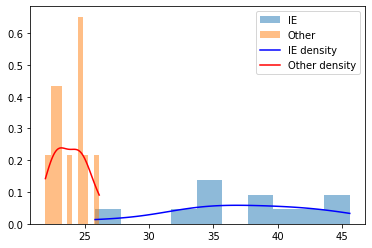

In [106]:
# Plot a histogram

kde_ie = gaussian_kde(yields_long_agg_wide.IE)
kde_other = gaussian_kde(yields_long_agg_wide.Other)

fig, ax = plt.subplots()

ax.hist(yields_long_agg_wide.IE, alpha = 0.5, label = 'IE', density = True)
ax.hist(yields_long_agg_wide.Other, alpha = 0.5, label = 'Other', density = True)

ie_range = np.linspace(min(yields_long_agg_wide.IE), max(yields_long_agg_wide.IE), 100)
other_range = np.linspace(min(yields_long_agg_wide.Other), max(yields_long_agg_wide.Other), 100)

ax.plot(ie_range, kde_ie(ie_range), color = 'blue', label = 'IE density')
ax.plot(other_range, kde_other(other_range), color = 'red', label = 'Other density')

ax.legend()

plt.show()

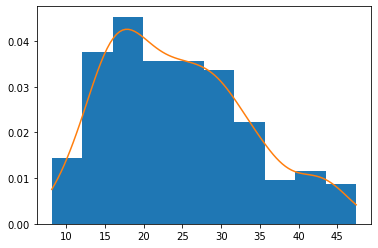

In [105]:
# There isn't much data here so I wont't aggregate

kde = gaussian_kde(yields_long.value)

fig, ax = plt.subplots()

ax.hist(yields_long.value, density = True)

kde_range = np.linspace(min(yields_long.value), max(yields_long.value), 100)

ax.plot(kde_range, kde(kde_range))

plt.show()

In [107]:
yields_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crops     264 non-null    object 
 1   strucpro  264 non-null    object 
 2   variable  264 non-null    object 
 3   geo       264 non-null    object 
 4   value     264 non-null    float64
 5   label     264 non-null    object 
dtypes: float64(1), object(5)
memory usage: 12.5+ KB
